<font color=red size=6>PREDICTIONS</font>

**Pere Mayol Carbonell, NIU:1669503** <br>
Paper on RNNs and time series forcasting - https://www.sciencedirect.com/science/article/abs/pii/S0169207020300996

Video on LSTMs for TSF and taking into account attention - https://www.youtube.com/watch?v=DKQerT3ybls

In [445]:
#import everything we need
import pandas as p
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')#just to make the plots look better.

#regarding the training and validation of thje data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [446]:
#Read the data and print the first 10 elements to check its okay.
data_EE = p.read_csv('/content/Consum-energia-Q-2018-2023-horari(1).csv')
data_EE.head(10)

,Date,Hour,Q-Enginyeria-Total [kWh]
0,1/1/2018,00:00,177.00
1,1/1/2018,01:00,177.44
2,1/1/2018,02:00,176.57
3,1/1/2018,03:00,174.98
4,1/1/2018,04:00,174.51
5,1/1/2018,05:00,191.13
6,1/1/2018,06:00,198.94
7,1/1/2018,07:00,203.42
8,1/1/2018,08:00,197.41
9,1/1/2018,09:00,195.12


<font color=red size=5>Data Viusalitzation & PreProcessing</font>

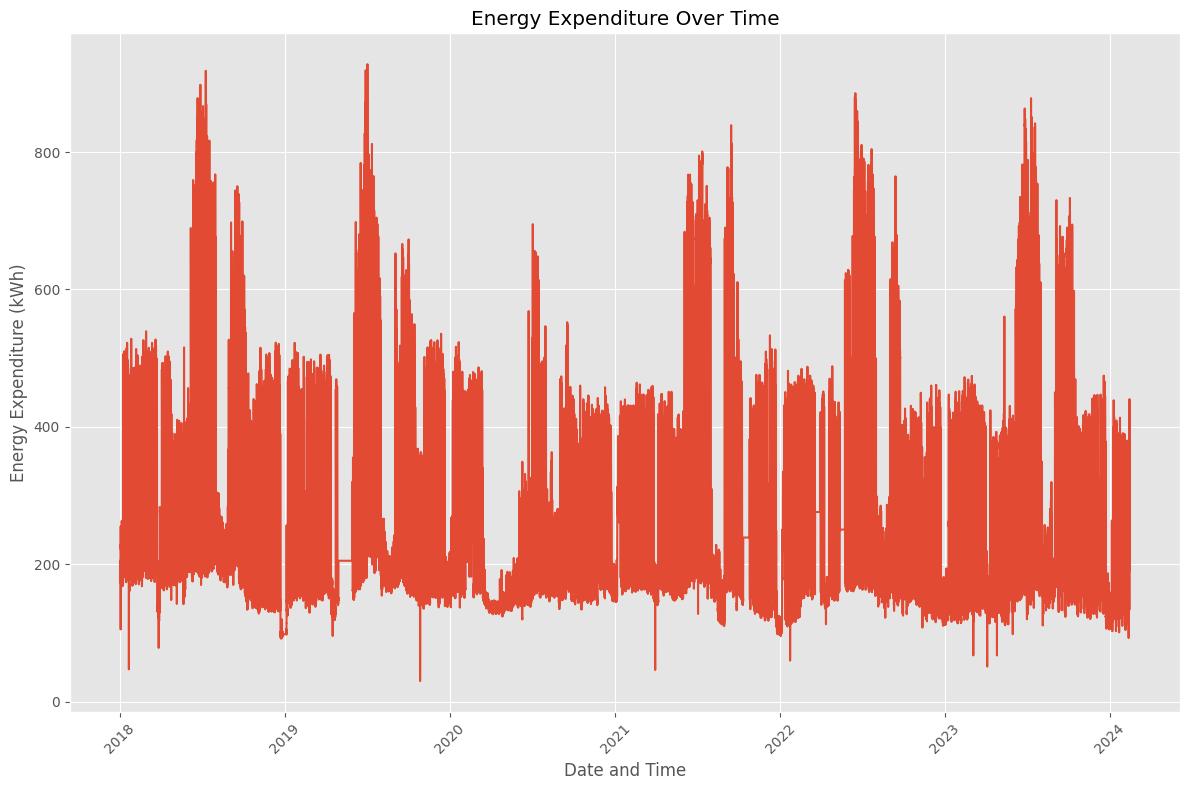

In [447]:
#For plotting Energy Expenditure over the years and see the overall behaviour.
data_EE['DateTime'] = p.to_datetime(data_EE['Date'] + ' ' + data_EE['Hour']) #Join the Date and Hour to represent the expenditure over Time

plt.figure(figsize=(12, 8))
plt.plot(data_EE['DateTime'], data_EE['Q-Enginyeria-Total [kWh]'])
plt.title('Energy Expenditure Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Energy Expenditure (kWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Daily mean expenditure for 4 2018 : 191264.5 kWh
Daily mean expenditure for 4 2019 : 158880.15 kWh
Daily mean expenditure for 4 2020 : 99995.66 kWh
Daily mean expenditure for 4 2021 : 181121.23 kWh
Daily mean expenditure for 4 2022 : 163396.12 kWh
Daily mean expenditure for 4 2023 : 133327.44 kWh
Daily mean expenditure for 4 2024 : 0.0 kWh


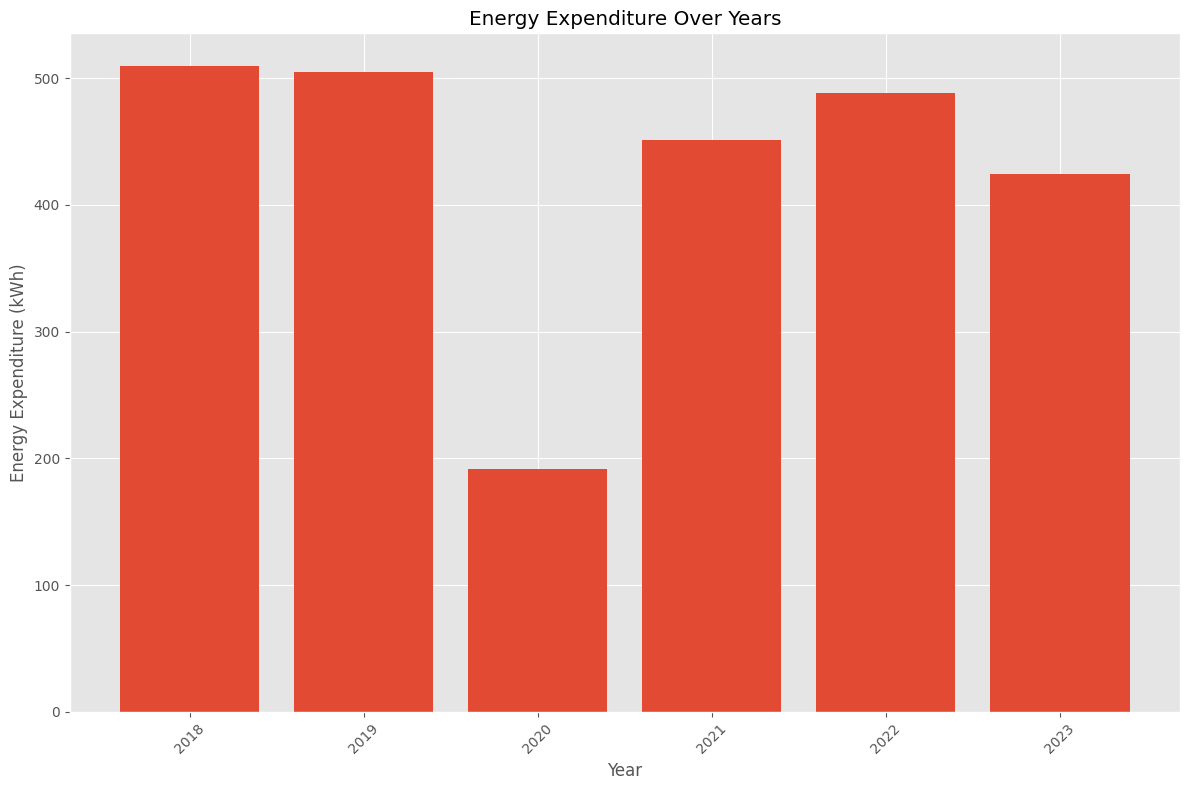

{2018: 191264.5, 2019: 158880.15, 2020: 99995.66, 2021: 181121.23, 2022: 163396.12, 2023: 133327.44, 2024: 0.0}


In [448]:
#This function returns the comparison over the years of the desired month.
def get_consumption_month(month: int, dataset: object, plot: bool):

    dataset['Date'] = p.to_datetime(dataset['Date'], format='%m/%d/%Y')

    # Extract year and month components from the 'Date' column
    dataset['Year'] = dataset['Date'].apply(lambda x: x.year)
    dataset['Month'] = dataset['Date'].apply(lambda x: x.month)

    years = [2018,2019,2020,2021,2022,2023,2024]
    Consumptions = {}
    for year in years:
        month_year = data_EE[(data_EE['Year'] == year) & (data_EE['Month'] == month)]
        expenditure = month_year['Q-Enginyeria-Total [kWh]'].sum()
        Consumptions[year]= expenditure
        Total_consumptions = data_EE[(data_EE['Month'] == month)]

        print("Daily mean expenditure for", month, year, ":", expenditure, "kWh")

    if plot == True:
        plt.figure(figsize=(12, 8))  # Adjust figure size as needed
        plt.bar(Total_consumptions['Date'].dt.year, Total_consumptions['Q-Enginyeria-Total [kWh]'])
        plt.title('Energy Expenditure Over Years')
        plt.xlabel('Year')
        plt.ylabel('Energy Expenditure (kWh)')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.grid(True)
        plt.tight_layout()  # Adjust layout to prevent clipping of labels
        plt.show()

    return Consumptions


consuptions = get_consumption_month(4,data_EE, plot=True)
print(consuptions)


In [449]:
#Fix the Date and Hour format so its usable
data_EE['Hour'] = data_EE['Hour'].apply(lambda x: ''.join(x.split(':')))
data_EE['Date'] = data_EE['Date'].apply(lambda x: x.strftime('%d%m%Y'))
data_EE.head()

,Date,Hour,Q-Enginyeria-Total [kWh],DateTime,Year,Month
0,01012018,0000,177.00,2018-01-01 00:00:00,2018,1
1,01012018,0100,177.44,2018-01-01 01:00:00,2018,1
2,01012018,0200,176.57,2018-01-01 02:00:00,2018,1
3,01012018,0300,174.98,2018-01-01 03:00:00,2018,1
4,01012018,0400,174.51,2018-01-01 04:00:00,2018,1


In [450]:
#To create a new feature based on which day of the week it was at each date.
data_EE['Date'] = p.to_datetime(data_EE['Date'], format='%d%m%Y')

data_EE['Day_of_Week'] = data_EE['Date'].dt.dayofweek

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_EE['Day_of_Week'] = data_EE['Day_of_Week'].map(lambda x: day_names[x])


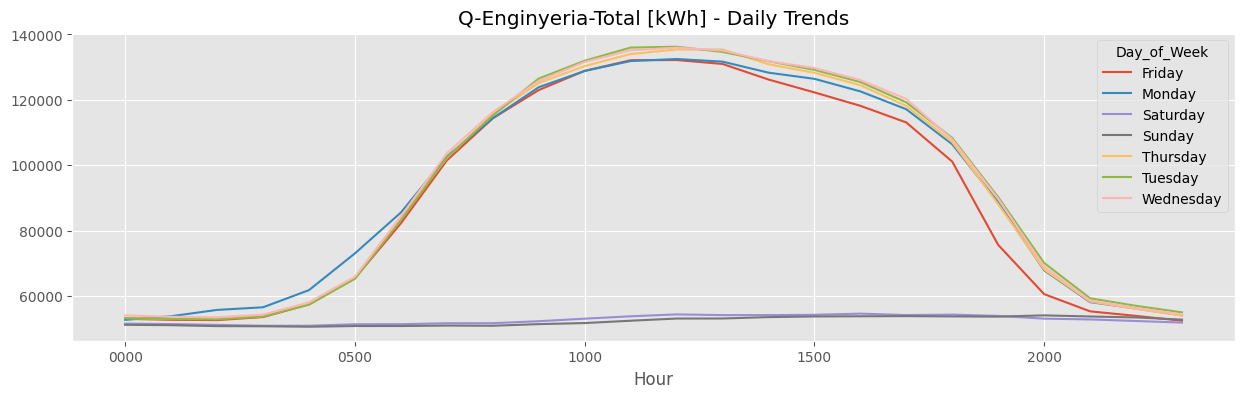

In [451]:
_ = data_EE.pivot_table(index=data_EE['Hour'],
                     columns='Day_of_Week',
                     values='Q-Enginyeria-Total [kWh]',
                     aggfunc='sum').plot(figsize=(15,4),
                     title='Q-Enginyeria-Total [kWh] - Daily Trends')

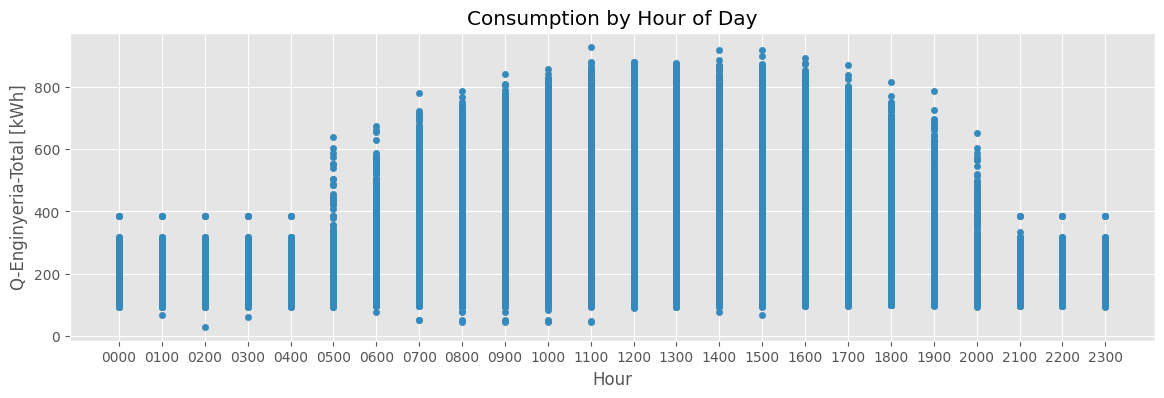

In [452]:
_ = data_EE[['Q-Enginyeria-Total [kWh]','Hour']].plot(x='Hour',
                                     y='Q-Enginyeria-Total [kWh]',
                                     kind='scatter',
                                     figsize=(14,4),
                                     title='Consumption by Hour of Day')

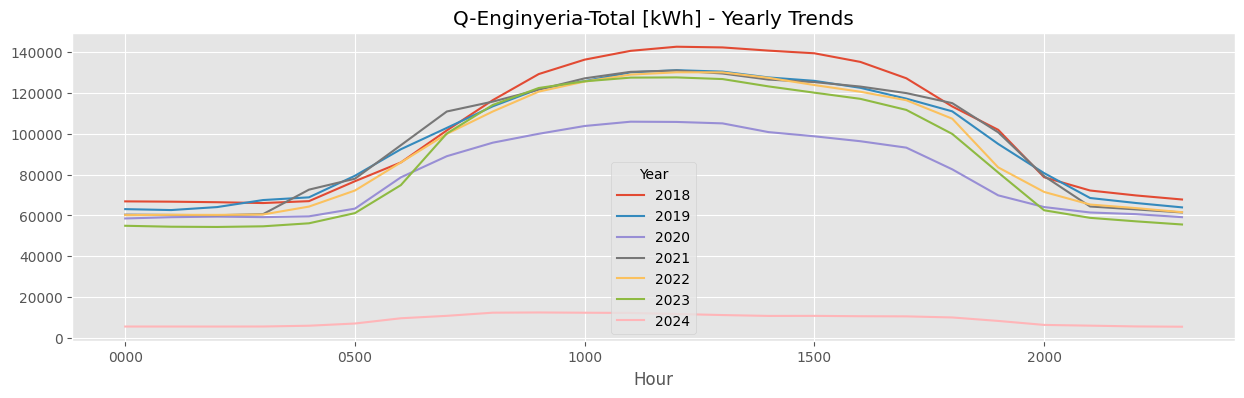

In [453]:
_ = data_EE.pivot_table(index=data_EE['Hour'],
                     columns='Year',
                     values='Q-Enginyeria-Total [kWh]',
                     aggfunc='sum').plot(figsize=(15,4),
                     title='Q-Enginyeria-Total [kWh] - Yearly Trends')

In [454]:
def min_max_normalize(column):
    min_val = min(column)
    max_val = max(column)
    normalized_column = [(x - min_val) / (max_val - min_val) for x in column]
    return normalized_column


#Normalize the 'Q-Enginyeria-Total [kWh]', to understand better the results and make it simpler.
#data_EE['Q-Enginyeria-Total [kWh]'] = min_max_normalize(data_EE['Q-Enginyeria-Total [kWh]'])

In [455]:
#Change day of the week from categorical to an integrer depending on which day it is.
data_EE['Day_of_Week'] = p.factorize(data_EE['Day_of_Week'])[0] + 1
data_EE['Day'] = data_EE['Date'].dt.day
data_EE.head(200)

,Date,Hour,Q-Enginyeria-Total [kWh],DateTime,Year,Month,Day_of_Week,Day
0,2018-01-01,0000,177.00,2018-01-01 00:00:00,2018,1,1,1
1,2018-01-01,0100,177.44,2018-01-01 01:00:00,2018,1,1,1
2,2018-01-01,0200,176.57,2018-01-01 02:00:00,2018,1,1,1
3,2018-01-01,0300,174.98,2018-01-01 03:00:00,2018,1,1,1
4,2018-01-01,0400,174.51,2018-01-01 04:00:00,2018,1,1,1
...,...,...,...,...,...,...,...,...
195,2018-01-09,0300,192.05,2018-01-09 03:00:00,2018,1,2,9
196,2018-01-09,0400,196.69,2018-01-09 04:00:00,2018,1,2,9
197,2018-01-09,0500,219.47,2018-01-09 05:00:00,2018,1,2,9
198,2018-01-09,0600,332.88,2018-01-09 06:00:00,2018,1,2,9


<font color=red size=5>Checking for Anomalies and Outliers</font>

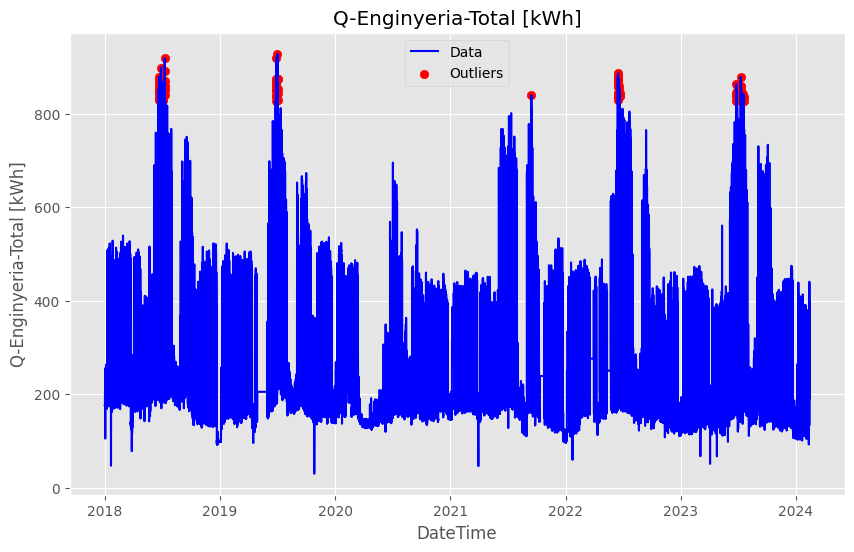

In [456]:
#Check for outliers and anomalies.
# Calculate Z-scores
data_EE['Z_score'] = (data_EE['Q-Enginyeria-Total [kWh]'] - data_EE['Q-Enginyeria-Total [kWh]'].mean()) / data_EE['Q-Enginyeria-Total [kWh]'].std()

# Define threshold for outliers
threshold = 4  # Adjust this threshold as needed

# Identify outliers
outliers = data_EE[data_EE['Z_score'].abs() > threshold]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data_EE['DateTime'], data_EE['Q-Enginyeria-Total [kWh]'], color='blue', label='Data')
plt.scatter(outliers['DateTime'], outliers['Q-Enginyeria-Total [kWh]'], color='red', label='Outliers')
plt.title('Q-Enginyeria-Total [kWh]')
plt.xlabel('DateTime')
plt.ylabel('Q-Enginyeria-Total [kWh]')
plt.legend()
plt.grid(True)
plt.show()

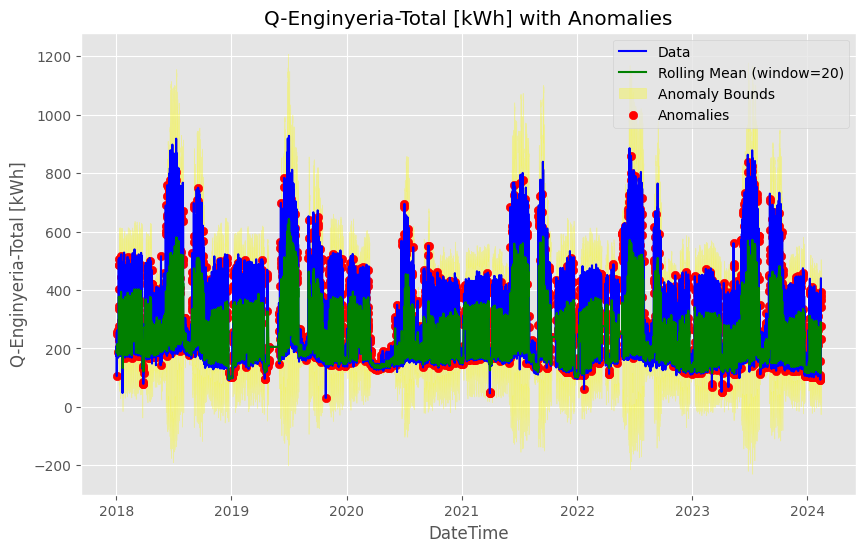

In [457]:

# Calculate rolling mean and standard deviation
window_size = 20 # Adjust window size as needed
rolling_mean = data_EE['Q-Enginyeria-Total [kWh]'].rolling(window=window_size).mean()
rolling_std = data_EE['Q-Enginyeria-Total [kWh]'].rolling(window=window_size).std()

# Calculate upper and lower bounds for anomalies
lower_bound = rolling_mean - 2 * rolling_std
upper_bound = rolling_mean + 2 * rolling_std

# Find anomalies
anomalies = data_EE[(data_EE['Q-Enginyeria-Total [kWh]'] < lower_bound) | (data_EE['Q-Enginyeria-Total [kWh]'] > upper_bound)]

# Plot the data and anomalies
plt.figure(figsize=(10, 6))
plt.plot(data_EE['DateTime'], data_EE['Q-Enginyeria-Total [kWh]'], color='blue', label='Data')
plt.plot(data_EE['DateTime'], rolling_mean, color='green', label='Rolling Mean (window={})'.format(window_size))
plt.fill_between(data_EE['DateTime'], lower_bound, upper_bound, color='yellow', alpha=0.3, label='Anomaly Bounds')
plt.scatter(anomalies['DateTime'], anomalies['Q-Enginyeria-Total [kWh]'], color='red', label='Anomalies')
plt.title('Q-Enginyeria-Total [kWh] with Anomalies')
plt.xlabel('DateTime')
plt.ylabel('Q-Enginyeria-Total [kWh]')
plt.legend()
plt.grid(True)
plt.show()


<font color=red size=8>Training</font>

<font color=blue size=6>LSTM</font>

In [458]:
data_EE.head()

,Date,Hour,Q-Enginyeria-Total [kWh],DateTime,Year,Month,Day_of_Week,Day,Z_score
0,2018-01-01,0000,177.00,2018-01-01 00:00:00,2018,1,1,1,-0.542153
1,2018-01-01,0100,177.44,2018-01-01 01:00:00,2018,1,1,1,-0.539078
2,2018-01-01,0200,176.57,2018-01-01 02:00:00,2018,1,1,1,-0.545159
3,2018-01-01,0300,174.98,2018-01-01 03:00:00,2018,1,1,1,-0.556272
4,2018-01-01,0400,174.51,2018-01-01 04:00:00,2018,1,1,1,-0.559558


In [459]:
#Create a new feature for the season.
def get_season(month):
    if month in [12, 1, 2]:
        return 1
    elif month in [3, 4, 5]:
        return 2
    elif month in [6, 7, 8]:
        return 3
    else:
        return 4

data_EE['Season'] = data_EE['Month'].apply(get_season)
data_EE.head()


,Date,Hour,Q-Enginyeria-Total [kWh],DateTime,Year,Month,Day_of_Week,Day,Z_score,Season
0,2018-01-01,0000,177.00,2018-01-01 00:00:00,2018,1,1,1,-0.542153,1
1,2018-01-01,0100,177.44,2018-01-01 01:00:00,2018,1,1,1,-0.539078,1
2,2018-01-01,0200,176.57,2018-01-01 02:00:00,2018,1,1,1,-0.545159,1
3,2018-01-01,0300,174.98,2018-01-01 03:00:00,2018,1,1,1,-0.556272,1
4,2018-01-01,0400,174.51,2018-01-01 04:00:00,2018,1,1,1,-0.559558,1


In [460]:
# Define special dates as tuples of (month, day)
special_dates = [(1, 1), (1, 6), (5, 1), (6, 24), (9, 11), (9, 24),(10, 12), (11, 1), (12, 6), (12, 8), (12, 25),(12, 26)]  # Add your special dates here

# Function to determine if a date is special
def is_special_day(row, special_dates):
    return 1 if (row['Month'], row['Day']) in special_dates else 0

# Apply the function to create the 'special day' feature
data_EE['special day'] = data_EE.apply(lambda row: is_special_day(row, special_dates), axis=1)

In [461]:
data_EE.head(100)

,Date,Hour,Q-Enginyeria-Total [kWh],DateTime,Year,Month,Day_of_Week,Day,Z_score,Season,special day
0,2018-01-01,0000,177.00,2018-01-01 00:00:00,2018,1,1,1,-0.542153,1,1
1,2018-01-01,0100,177.44,2018-01-01 01:00:00,2018,1,1,1,-0.539078,1,1
2,2018-01-01,0200,176.57,2018-01-01 02:00:00,2018,1,1,1,-0.545159,1,1
3,2018-01-01,0300,174.98,2018-01-01 03:00:00,2018,1,1,1,-0.556272,1,1
4,2018-01-01,0400,174.51,2018-01-01 04:00:00,2018,1,1,1,-0.559558,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95,2018-01-04,2300,186.89,2018-01-04 23:00:00,2018,1,4,4,-0.473026,1,0
96,2018-01-05,0000,183.08,2018-01-05 00:00:00,2018,1,5,5,-0.499656,1,0
97,2018-01-05,0100,182.06,2018-01-05 01:00:00,2018,1,5,5,-0.506786,1,0
98,2018-01-05,0200,179.85,2018-01-05 02:00:00,2018,1,5,5,-0.522233,1,0


In [462]:

data_train = data_EE[data_EE['Date'] <= "2021-09-09"].copy()
data_test = data_EE[data_EE['Date'] > "2021-09-09"].copy()


X = ['Year', 'Day', 'Month', 'Day_of_Week', 'Season', 'Z_score', 'special day']
Y = ['Q-Enginyeria-Total [kWh]']

train_x = data_train[X].copy()
train_y = data_train[Y].copy()
test_x = data_test[X].copy()
test_y = data_test[Y].copy()

# Verify the shapes of the datasets
print(f"Train X shape: {train_x.shape} and Train X: {train_x}")
print(f"Train Y shape: {train_y.shape} and Train Y: {train_y}")
print(f"Test X shape: {test_x.shape} and Test X: {test_x}")
print(f"Test Y shape: {test_y.shape} and Test Y: {test_y}")


Train X shape: (32351, 7) and Train X:        Year  Day  Month  Day_of_Week  Season   Z_score  special day
0      2018    1      1            1       1 -0.542153            1
1      2018    1      1            1       1 -0.539078            1
2      2018    1      1            1       1 -0.545159            1
3      2018    1      1            1       1 -0.556272            1
4      2018    1      1            1       1 -0.559558            1
...     ...  ...    ...          ...     ...       ...          ...
32346  2021    9      9            4       4  1.917992            0
32347  2021    9      9            4       4  0.773577            0
32348  2021    9      9            4       4 -0.475123            0
32349  2021    9      9            4       4 -0.511399            0
32350  2021    9      9            4       4 -0.585210            0

[32351 rows x 7 columns]
Train Y shape: (32351, 1) and Train Y:        Q-Enginyeria-Total [kWh]
0                        177.00
1               

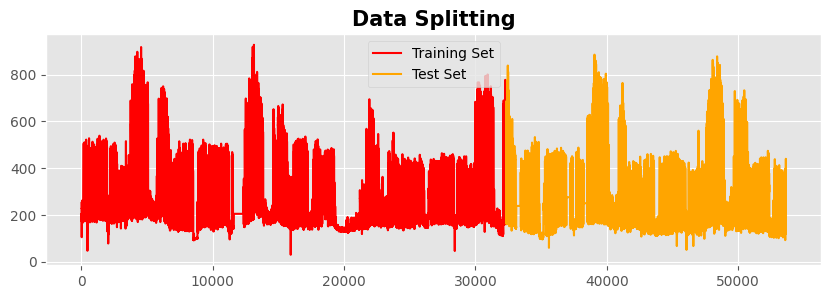

In [463]:
#Show Global Active Power from Test and Train Datasets
plt.figure(figsize = (10, 3))
data_train["Q-Enginyeria-Total [kWh]"].plot(label = "Training Set", color = "Red")
data_test["Q-Enginyeria-Total [kWh]"].plot(label  = "Test Set", color = "Orange")
plt.title("Data Splitting", weight = "bold", fontsize = 15)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Training vs Test Set')

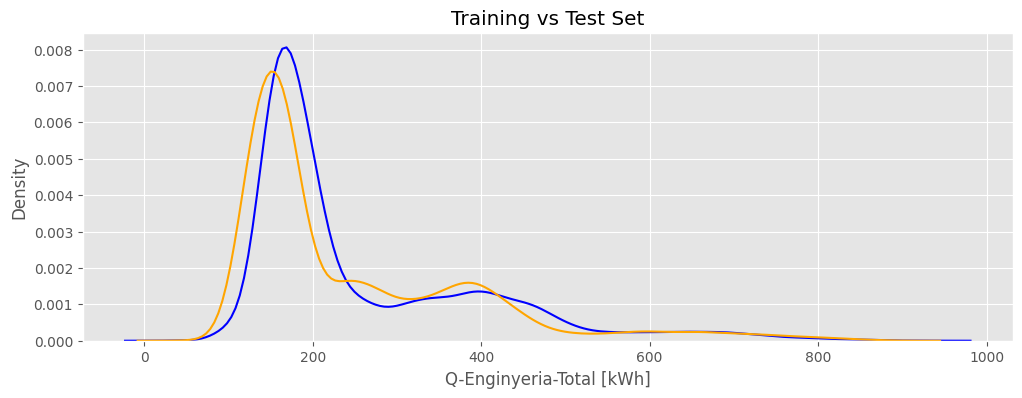

In [464]:
plt.figure(figsize=(12,4))
sns.kdeplot(data_train['Q-Enginyeria-Total [kWh]'], label  = "Training Set", color = "blue")
sns.kdeplot(data_test['Q-Enginyeria-Total [kWh]'], label  = "Test Set", color = "orange")
plt.xlabel("Q-Enginyeria-Total [kWh]")
plt.title("Training vs Test Set")

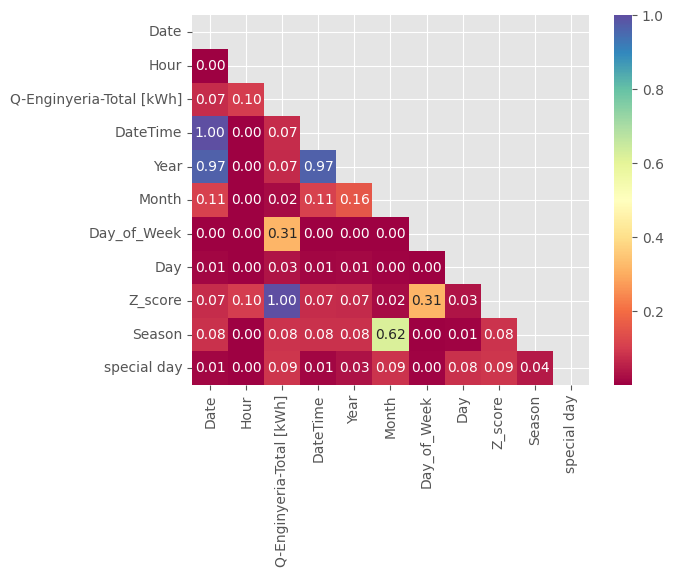

In [465]:
plt.figure()
correlations = data_train.corr().abs()
mask = np.triu(np.ones_like(correlations, dtype = "bool"))
sns.heatmap(correlations, annot = True, fmt = ".2f", cmap = "Spectral", mask = mask)
plt.show()

In [466]:
data_EE.head(100)

,Date,Hour,Q-Enginyeria-Total [kWh],DateTime,Year,Month,Day_of_Week,Day,Z_score,Season,special day
0,2018-01-01,0000,177.00,2018-01-01 00:00:00,2018,1,1,1,-0.542153,1,1
1,2018-01-01,0100,177.44,2018-01-01 01:00:00,2018,1,1,1,-0.539078,1,1
2,2018-01-01,0200,176.57,2018-01-01 02:00:00,2018,1,1,1,-0.545159,1,1
3,2018-01-01,0300,174.98,2018-01-01 03:00:00,2018,1,1,1,-0.556272,1,1
4,2018-01-01,0400,174.51,2018-01-01 04:00:00,2018,1,1,1,-0.559558,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95,2018-01-04,2300,186.89,2018-01-04 23:00:00,2018,1,4,4,-0.473026,1,0
96,2018-01-05,0000,183.08,2018-01-05 00:00:00,2018,1,5,5,-0.499656,1,0
97,2018-01-05,0100,182.06,2018-01-05 01:00:00,2018,1,5,5,-0.506786,1,0
98,2018-01-05,0200,179.85,2018-01-05 02:00:00,2018,1,5,5,-0.522233,1,0


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


506/506 [==============================] - 5s 5ms/step - loss: 0.0180 - val_loss: 0.0039
Epoch 2/25
506/506 [==============================] - 2s 4ms/step - loss: 0.0011 - val_loss: 2.9314e-04
Epoch 3/25
506/506 [==============================] - 2s 4ms/step - loss: 1.4308e-04 - val_loss: 2.2407e-04
Epoch 4/25
506/506 [==============================] - 3s 6ms/step - loss: 7.4156e-05 - val_loss: 1.0733e-04
Epoch 5/25
506/506 [==============================] - 2s 5ms/step - loss: 3.5903e-05 - val_loss: 9.0906e-05
Epoch 6/25
506/506 [==============================] - 2s 4ms/step - loss: 1.8556e-05 - val_loss: 9.1139e-05
Epoch 7/25
506/506 [==============================] - 2s 4ms/step - loss: 1.2262e-05 - val_loss: 9.9127e-05
Epoch 8/25
506/506 [==============================] - 2s 4ms/step - loss: 9.5733e-06 - val_loss: 9.4299e-05
Epoch 9/25
506/506 [==============================] - 2s 4ms/step - loss: 7.9264e-06 - val_loss: 7.9294e-05
Epoch 10/25
506/506 [==============================

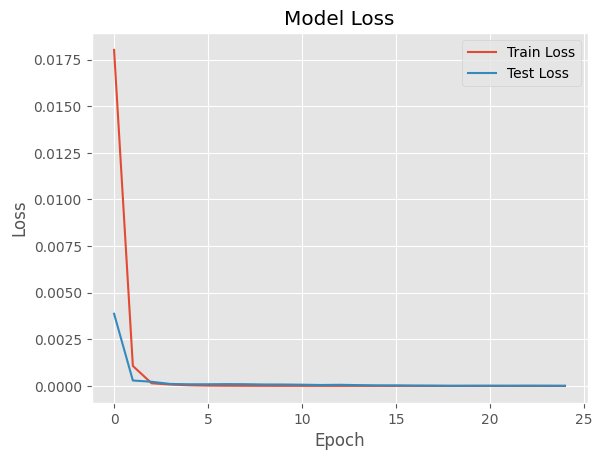

In [467]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import itertools
from keras.layers import LSTM
from keras.layers import Dropout

# Convert DataFrame to numpy arrays
train_X_values = train_x.values
train_Y_values = train_y.values
test_X_values = test_x.values
test_Y_values = test_y.values

# Scale the data
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_Y = MinMaxScaler(feature_range=(0, 1))

train_X_scaled = scaler_X.fit_transform(train_X_values)
train_Y_scaled = scaler_Y.fit_transform(train_Y_values)
test_X_scaled = scaler_X.transform(test_X_values)
test_Y_scaled = scaler_Y.transform(test_Y_values)

# Reshape input data to be 3D for LSTM [samples, timesteps, features]
train_X_reshaped = np.reshape(train_X_scaled, (train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))
test_X_reshaped = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

learning_rate = 1e-3 # Set your desired learning rate here
optimizer_lstm = Adam(learning_rate=learning_rate)

# Build LSTM model with dropout
model = Sequential()
model.add(LSTM(units=7, input_shape=(train_X_reshaped.shape[1], train_X_reshaped.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer=optimizer_lstm, loss='mean_squared_error')

model_save_path = '/content/model.h5'
model.save(model_save_path)

# Train the model and capture history
history = model.fit(train_X_reshaped, train_Y_scaled, epochs=25, batch_size=64, verbose=1, validation_data=(test_X_reshaped, test_Y_scaled))

# Make predictions
train_predict = model.predict(train_X_reshaped)
test_predict = model.predict(test_X_reshaped)

# Inverse transform predictions
train_predict = scaler_Y.inverse_transform(train_predict)
test_predict = scaler_Y.inverse_transform(test_predict)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(train_y, train_predict))
test_rmse = np.sqrt(mean_squared_error(test_y, test_predict))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


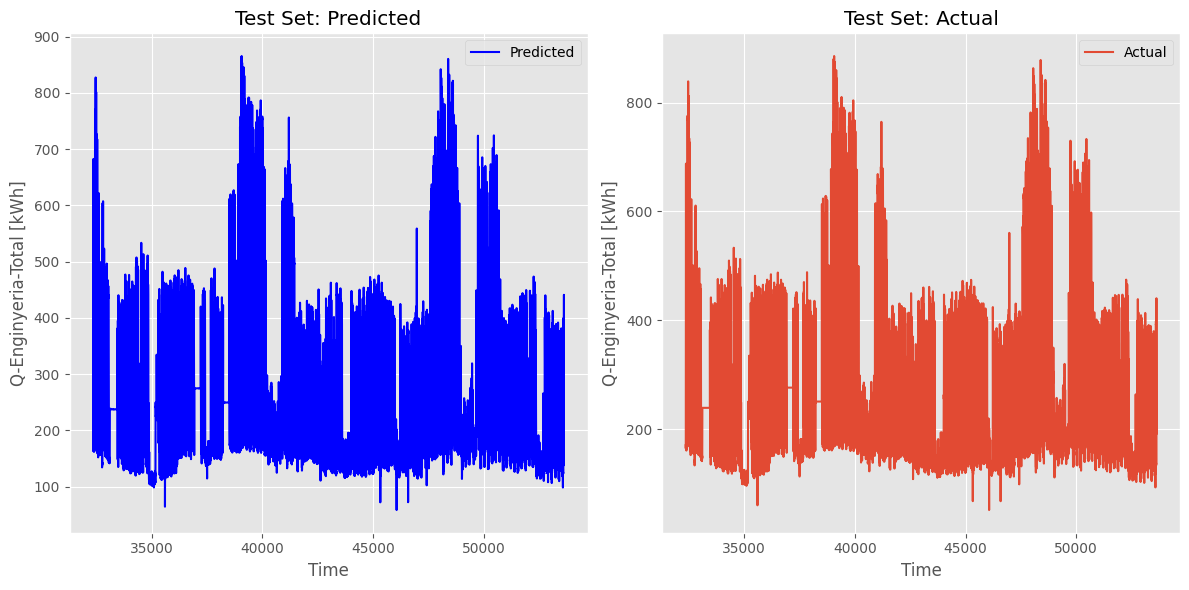

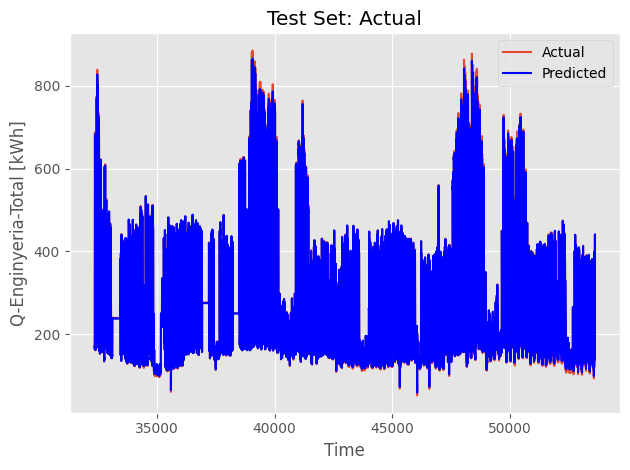

In [468]:
# Plot the predictions
plt.figure(figsize=(12, 6))

# Test set
plt.subplot(1, 2, 1)
plt.plot(test_y.index, test_predict, label='Predicted', color='blue')
plt.title('Test Set: Predicted')
plt.xlabel('Time')
plt.ylabel('Q-Enginyeria-Total [kWh]')
plt.legend()

# Test set
plt.subplot(1, 2, 2)
plt.plot(test_y.index, test_y, label='Actual')
plt.title('Test Set: Actual')
plt.xlabel('Time')
plt.ylabel('Q-Enginyeria-Total [kWh]')
plt.legend()

plt.tight_layout()
plt.show()

plt.plot(test_y.index, test_y, label='Actual')
plt.plot(test_y.index, test_predict, label='Predicted', color='blue')
plt.title('Test Set: Actual')
plt.xlabel('Time')
plt.ylabel('Q-Enginyeria-Total [kWh]')
plt.legend()

plt.tight_layout()
plt.show()

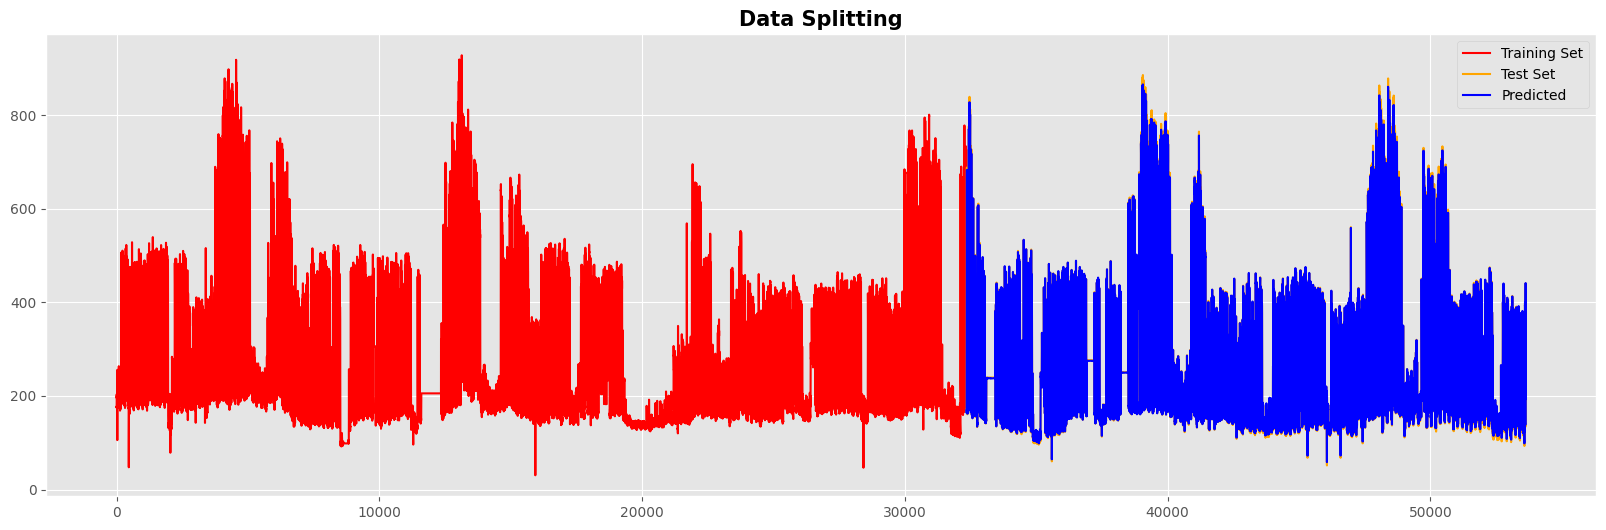

In [469]:
plt.figure(figsize = (20,6))
data_train["Q-Enginyeria-Total [kWh]"].plot(label = "Training Set", color = "Red")
data_test["Q-Enginyeria-Total [kWh]"].plot(label  = "Test Set", color = "Orange")
plt.plot(test_y.index, test_predict, label='Predicted', color='blue')
plt.title("Data Splitting", weight = "bold", fontsize = 15)
plt.legend()
plt.show()

In [470]:
print(f'The lenght of Predictions==>{len(test_predict)}')
print(f'The lenght of Actual test==>{len(test_Y_values)}')

The lenght of Predictions==>21278
The lenght of Actual test==>21278


In [471]:
print(test_predict[32])
print(test_Y_values[32])
print(test_predict)

[163.29636]
[161.99]
[[169.01274]
 [165.91884]
 [166.6039 ]
 ...
 [418.54333]
 [441.10767]
 [194.07274]]


In [472]:
values = []

for i in range(len(test_predict)):
  key = test_Y_values[i].tolist()[0]
  value = test_predict[i].tolist()[0]
  values.append([key,value])


In [473]:
import pandas as pd
df = pd.DataFrame(values, columns=['Value', 'Prediction'])

In [474]:
df.head()

,Value,Prediction
0,170.47,169.012741
1,167.31,165.918839
2,168.01,166.603897
3,164.74,163.405075
4,168.61,167.191223


In [475]:
from datetime import datetime,timedelta

# Initial date and time
initial_test_day = '2021-09-10'  # in format year, month, day
initial_test_time = '00:00'  # in format hour, minute

# Combine date and time into a single datetime object
current_datetime = datetime.strptime(initial_test_day + ' ' + initial_test_time, '%Y-%m-%d %H:%M')

datetime_values = []

for i in range(len(df)):
    datetime_values.append(current_datetime.strftime('%Y-%m-%d %H:%M'))
    current_datetime += timedelta(hours=1)

# Add the new date-time column to the DataFrame
df['Date'] = datetime_values

# Print the first few rows of the DataFrame to verify the result
print(df.head(50))

     Value  Prediction              Date
0   170.47  169.012741  2021-09-10 00:00
1   167.31  165.918839  2021-09-10 01:00
2   168.01  166.603897  2021-09-10 02:00
3   164.74  163.405075  2021-09-10 03:00
4   168.61  167.191223  2021-09-10 04:00
5   185.07  183.349167  2021-09-10 05:00
6   358.27  356.724976  2021-09-10 06:00
7   484.61  483.808716  2021-09-10 07:00
8   476.03  475.228516  2021-09-10 08:00
9   499.37  498.543091  2021-09-10 09:00
10  564.84  563.432678  2021-09-10 10:00
11  617.52  614.981140  2021-09-10 11:00
12  673.09  668.596008  2021-09-10 12:00
13  687.84  682.683533  2021-09-10 13:00
14  625.82  623.041199  2021-09-10 14:00
15  557.31  556.012634  2021-09-10 15:00
16  506.89  506.036469  2021-09-10 16:00
17  539.52  538.435486  2021-09-10 17:00
18  466.19  465.375702  2021-09-10 18:00
19  314.15  312.223602  2021-09-10 19:00
20  187.48  185.721985  2021-09-10 20:00
21  174.23  172.698349  2021-09-10 21:00
22  174.92  173.375214  2021-09-10 22:00
23  170.71  169.

In [476]:
print(df)

        Value  Prediction              Date
0      170.47  169.012741  2021-09-10 00:00
1      167.31  165.918839  2021-09-10 01:00
2      168.01  166.603897  2021-09-10 02:00
3      164.74  163.405075  2021-09-10 03:00
4      168.61  167.191223  2021-09-10 04:00
...       ...         ...               ...
21273  363.22  364.145874  2024-02-13 09:00
21274  388.69  389.548370  2024-02-13 10:00
21275  417.80  418.543335  2024-02-13 11:00
21276  440.50  441.107666  2024-02-13 12:00
21277  191.70  194.072739  2024-02-13 13:00

[21278 rows x 3 columns]


In [477]:
df['Difference'] = df['Prediction'] - df['Value']

In [478]:
df.head()

,Value,Prediction,Date,Difference
0,170.47,169.012741,2021-09-10 00:00,-1.457259
1,167.31,165.918839,2021-09-10 01:00,-1.391161
2,168.01,166.603897,2021-09-10 02:00,-1.406103
3,164.74,163.405075,2021-09-10 03:00,-1.334925
4,168.61,167.191223,2021-09-10 04:00,-1.418777


In [479]:
sum_total = 0
for item in df['Difference']:
  sum_total += item
average_mistake = sum_total/(len(df['Difference']))
print(f'The average mistake for all test points is = {average_mistake}')

The average mistake for all test points is = 0.3007316060410866


In [480]:
def max_difference(df, number):
  for i in range(len(df['Difference'])):
    if abs(df['Difference'].iloc[i]) > number:
      print(df.iloc[i])
      return True
  return False

def distance_count(df, number):
  count = 0
  for i in range(len(df['Difference'])):
    if abs(df['Difference'].iloc[i]) > number:
      count += 1
  print(f'The number of points with distance higher than {number} are {count}')
  return count


In [481]:
distance_count(df=df, number=1)
print(len(df))

The number of points with distance higher than 1 are 11776
21278


In [482]:
max_difference(df, 32)

False

In [483]:
df.head(10)

,Value,Prediction,Date,Difference
0,170.47,169.012741,2021-09-10 00:00,-1.457259
1,167.31,165.918839,2021-09-10 01:00,-1.391161
2,168.01,166.603897,2021-09-10 02:00,-1.406103
3,164.74,163.405075,2021-09-10 03:00,-1.334925
4,168.61,167.191223,2021-09-10 04:00,-1.418777
5,185.07,183.349167,2021-09-10 05:00,-1.720833
6,358.27,356.724976,2021-09-10 06:00,-1.545024
7,484.61,483.808716,2021-09-10 07:00,-0.801284
8,476.03,475.228516,2021-09-10 08:00,-0.801484
9,499.37,498.543091,2021-09-10 09:00,-0.826909


In [484]:
csv_file_path = 'predictions_data_final.csv'
df.to_csv(csv_file_path, index=False)

In [486]:
from google.colab import files
files.download(csv_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>